# Fraud Detection Dataset

Data source: https://www.kaggle.com/datasets/amanalisiddiqui/fraud-detection-dataset?resource=download

The dataset contains the records of financial transactions for fraud detection. (6.3 Million Records)

CASH-IN: is the process of increasing the balance of account by paying in cash to a merchant.

CASH-OUT: is the opposite process of CASH-IN, it means to withdraw cash from a merchant which decreases the balance of the account.

DEBIT: is similar process than CASH-OUT and involves sending the money from the mobile money service to a bank account.

PAYMENT: is the process of paying for goods or services to merchants which decreases the balance of the account and increases the balance of the receiver.

TRANSFER: is the process of sending money to another user of the service through the mobile money platform

In [1]:
import os
os.chdir(r'F:\practice\fraud')

import pandas as pd
df = pd.read_csv('data/AIML Dataset.csv')

In [2]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
# Information about data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
df['isFraud'].value_counts()/len(df)

isFraud
0    0.998709
1    0.001291
Name: count, dtype: float64

- We can see that the dataset is highly imbalanced, with only 0.13% of transactions being fraudulent.
- If we predict all transactions as non-fraudulent, we would achieve an accuracy of 99.87%. This shows that accuracy is not an appropriate evaluation metric for highly imbalanced data.

# Let's explore some visualizations of the data.

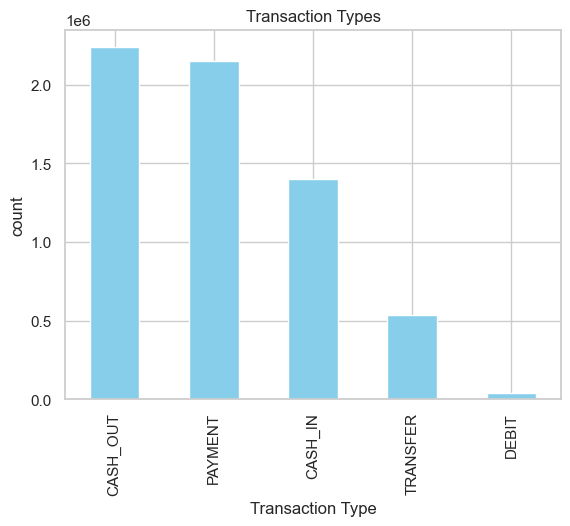

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set(style='whitegrid')

# Distribution of transaction types
df['type'].value_counts().plot(kind='bar', title='Transaction Types', color='skyblue')
plt.xlabel('Transaction Type')
plt.ylabel('count')
plt.show()

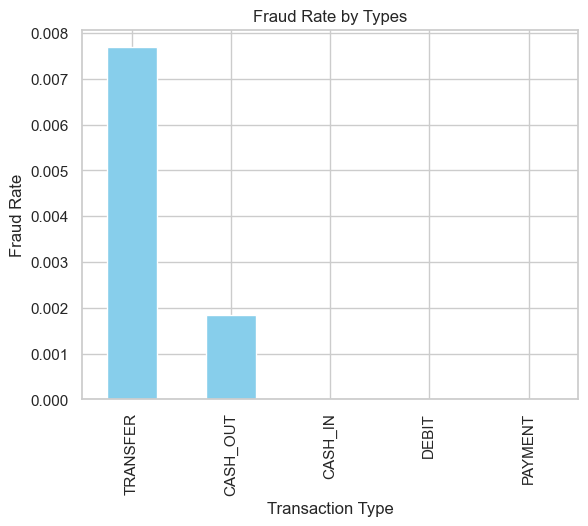

In [6]:
# Which transaction type is more likely to be fraudulent?
fraud_by_type=df.groupby('type')['isFraud'].mean().sort_values(ascending=False)
fraud_by_type.plot(kind='bar', title='Fraud Rate by Types', color='skyblue')
plt.xlabel('Transaction Type')
plt.ylabel('Fraud Rate')
plt.show()

- The plot shows that fraudulent transactions occur exclusively in TRANSFER and CASH_OUT transaction types.

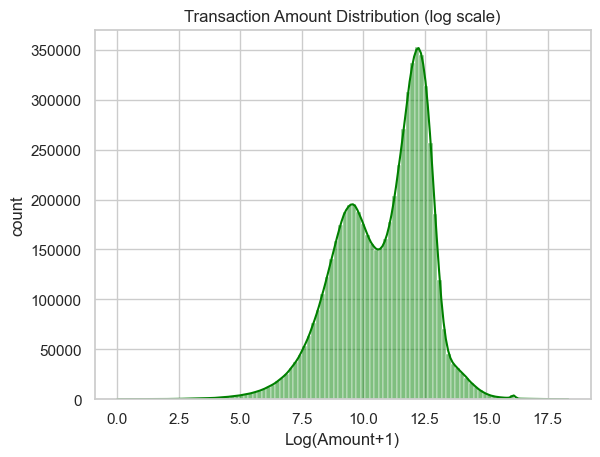

In [7]:
# The distribution of transaction amount
sns.histplot(np.log1p(df['amount']),bins=100,kde=True,color='green')
plt.title('Transaction Amount Distribution (log scale)')
plt.xlabel('Log(Amount+1)')
plt.ylabel('count')
plt.show()

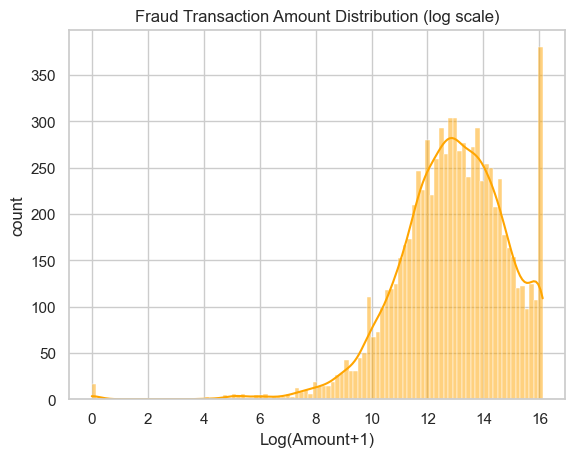

In [16]:
# The distribution of fraud transaction amount
df1=df[df['isFraud']==1]
sns.histplot(np.log1p(df1['amount']),bins=100,kde=True,color='orange')
plt.title('Fraud Transaction Amount Distribution (log scale)')
plt.xlabel('Log(Amount+1)')
plt.ylabel('count')
plt.show()

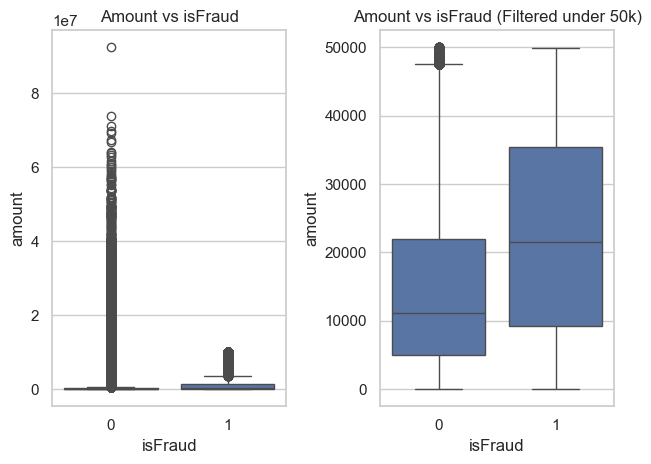

In [13]:
# Amount vs isFraud 
plt.subplot(1,2,1)
sns.boxplot(data=df, x='isFraud', y='amount')
plt.title('Amount vs isFraud')

plt.subplot(1,2,2)
sns.boxplot(data=df[df['amount']<50000], x='isFraud', y='amount')
plt.title('Amount vs isFraud (Filtered under 50k)')
plt.tight_layout()
plt.show()

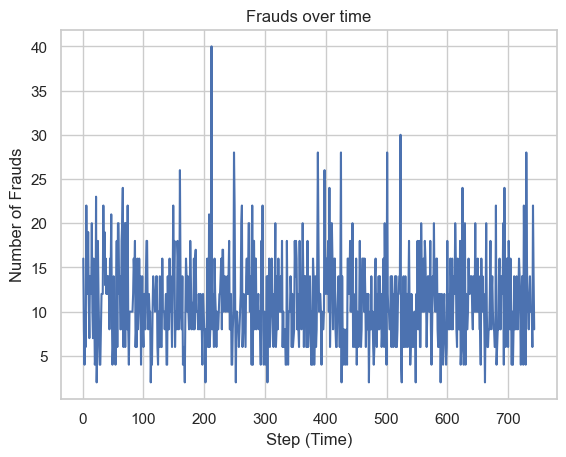

In [17]:
# frauds_per_step
frauds_per_step=df[df['isFraud']==1]['step'].value_counts().sort_index()
plt.plot(frauds_per_step.index, frauds_per_step.values,label='Frauds per step')
plt.xlabel('Step (Time)')
plt.ylabel('Number of Frauds')
plt.title('Frauds over time')
plt.show()

- It appears that fraudulent behavior is not correlated with the time step, so we can remove the step feature.

In [18]:
df.drop(columns='step', inplace=True)

In [19]:
top_senders=df['nameOrig'].value_counts().head(10)
top_senders

nameOrig
C1677795071    3
C1999539787    3
C724452879     3
C1976208114    3
C400299098     3
C1784010646    3
C1530544995    3
C1065307291    3
C545315117     3
C1902386530    3
Name: count, dtype: int64

In [20]:
top_receivers=df['nameDest'].value_counts().head(10)
top_receivers

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C1789550256     99
C451111351      99
C1360767589     98
C1023714065     97
Name: count, dtype: int64

In [21]:
fraud_users=df[df['isFraud']==1]['nameOrig'].value_counts().head(10)
fraud_users

nameOrig
C1305486145    1
C840083671     1
C1420196421    1
C2101527076    1
C137533655     1
C1118430673    1
C749981943     1
C1334405552    1
C467632528     1
C1364127192    1
Name: count, dtype: int64

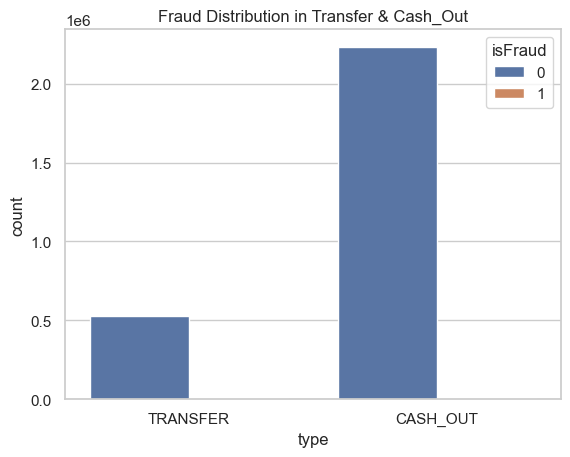

In [22]:
fraud_types=df[df['type'].isin(['TRANSFER','CASH_OUT'])]
#fraud_types['type'].value_counts()
sns.countplot(data=fraud_types,x='type',hue='isFraud')
plt.title('Fraud Distribution in Transfer & Cash_Out')
plt.show()

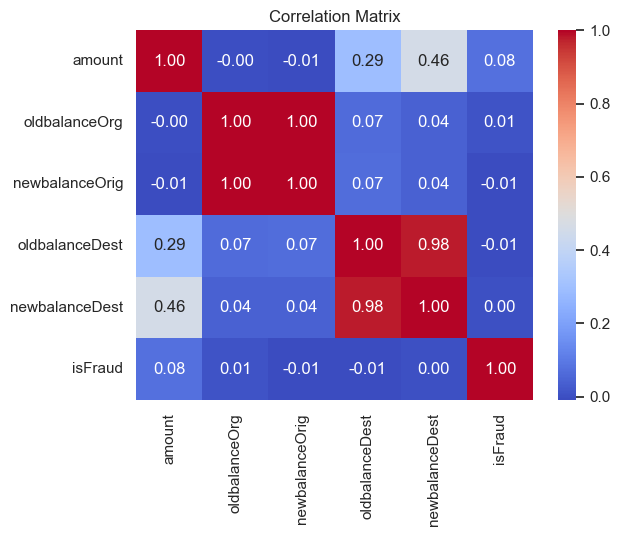

In [23]:
# Feature correlations
corr=df[['amount','oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest','isFraud']].corr()
sns.heatmap(corr,annot=True, cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

- From this plot, it appears that each single feature is not highly correlated with fraudulent behavior.

# Build a machine learning model to do fraud classification.

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [25]:
df_model=df.drop(['nameOrig','nameDest','isFlaggedFraud'],axis=1)
categorical=['type']
numeric=['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

y=df_model['isFraud']
X=df_model.drop('isFraud',axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3,stratify=y)

preprocessor=ColumnTransformer(
    transformers=[
        ('num',StandardScaler(),numeric),
        ('cat',OneHotEncoder(drop='first'),categorical)
        ],remainder='drop')

pipeline=Pipeline([
    ('prep',preprocessor),
    ('clf',LogisticRegression(class_weight='balanced',max_iter=1000))])

pipeline.fit(X_train,y_train)
y_pred=pipeline.predict(X_test)

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1906322
           1       0.02      0.94      0.04      2464

    accuracy                           0.95   1908786
   macro avg       0.51      0.94      0.51   1908786
weighted avg       1.00      0.95      0.97   1908786



- We can look at recall, which is 0.94. So the Logistic Regression model is doing a quite good job.
- recall: Out of all the positive classes, how much we predicted correctly. It should be as high as possible.

In [28]:
print(confusion_matrix(y_test,y_pred))

[[1801685  104637]
 [    153    2311]]


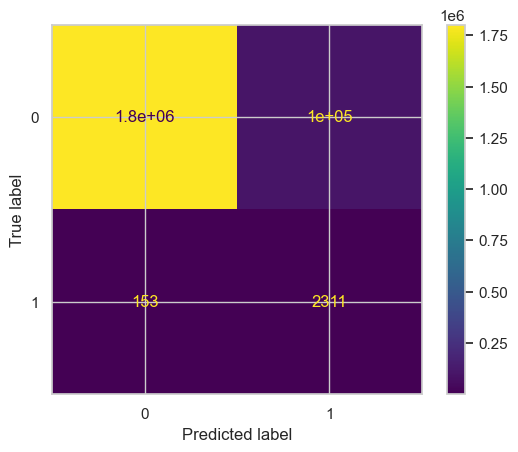

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred),
                              display_labels=pipeline.classes_)
disp.plot()

- We can see that high recall is achieved by predicting as many samples as fraud as possible, which leads to low precision.

In [31]:
# Save the model
import joblib
joblib.dump(pipeline,'fraud_detection_pipeline.pkl')

['fraud_detection_pipeline.pkl']

- After that, we can build an app through streamlit and then deploy the app.